<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360"/>

# Project ASSIGNMENT - House Price Prediction Model

###  This is a House dataset having 1460 observation and 81 different variables. You have to create a linear regression model using the provided predictor variables for the prediction of sales value of House.

#### Submited by Harjeet Kaur (Harjeet31@gmail.com) INSAID June2019 Cohort.

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Describing Qualitative and Quantitative columns in dataset](#section3)
4. [Distribution of Target Variable](#section4)<br>
5. [Data Cleaning](#section5)<br>
    - 5.1 [Handling Missing Values](#section501)<br>
6. [Features Selection - Correlation Matrix](#section6)<br>
    - 6.1[Selecting Highly Correlated features](#section601)<br>
7. [Graphical relation between target and features](#section7)<br>
      - [SalePrice Vs Overall](#section701)<br>
      - [Living Area Vs SalePrice](#section702)<br>
8. .[Modeling and Prediction](#section8)<br>
    - Linear Regression
    - Linear Regression gridSearchCV
    - Random forest Regressor
    - GradientBoostingRegressor
9.   [Model Evaulation](#section9)<br>
10.  Repeat this with feature = 10 , 15 and 161 features<br>
11. [Comparsion of algo and ML model](#section10)
    

<a id=section1></a>
### 1. Problem Statement

This notebook is going to be focused on solving the problem of predicting house prices for house buyers and house sellers.

A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value.

We are going to take advantage of all of the feature variables available to use and use it to analyze and predict house prices.

Client Housebuyer: This client wants to find their next dream home with a reasonable price tag. They have their locations of interest ready. Now, they want to know if the house price matches the house value. With this study, they can understand which features (ex. Number of bathrooms, location, etc.) influence the final price of the house. If all matches, they can ensure that they are getting a fair price.

Client Houseseller: Think of the average house-flipper. This client wants to take advantage of the features that influence a house price the most. They typically want to buy a house at a low price and invest on the features that will give the highest return. For example, buying a house at a good location but small square footage. The client will invest on making rooms at a small cost to get a large return.

![HousePricePic.jpg](/HousePricePic.jpg)

#### In order to evaluate the house price with all given feature values. I have performed three iterations

- Select 10 highly corelated features to build model 
- Select 15 highly corelated features to build model
- Consider all the numerical and categorical features upto 161 to build the model

And evaluate the model on different metrics MAE,MSE,RMSE,R2 Score, Accuracy.

<a id=section2></a>
## 2. Loading Packages
<img src="pics/HousePricePic.jpg" width="740" height="760"/>

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

#package to ignore Deprecated warning messages
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## 2. Loading and Inspecting Data

In [2]:
#Load the dataset

housedata = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv")

housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Shape of data

housedata.shape

(1460, 81)

There are 1460 observation with 81 variables defined.

In [4]:
# info of dataset

housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

There are total 43 qualitative variables and 38 quantitative variables.

In [5]:
# Describe the dataset

housedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We have the house dataset from the year 1872 to 2010 with sale price of minimum of ##dollar 34900 to maximum of 755000##

In [6]:
# Getting info about keys

housedata.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<a id=section3></a>
## Describing Qualitative and Quantitative columns in dataset

In [7]:
quantitative = [f for f in housedata.columns if housedata.dtypes[f] != 'object']

#removing ID and SalePrice from quantitative

quantitative.remove('SalePrice')
quantitative.remove('Id')

print("quantitative variables are in dataset",len(quantitative))
quantitative




quantitative variables are in dataset 36


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [8]:
qualitative = [f for f in housedata.columns if housedata.dtypes[f] == 'object']
print("qualitative variables are in dataset",len(qualitative))

qualitative


qualitative variables are in dataset 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

<a id=section4></a>
## 3. Pre-processing of data  - Cleaning

Let us check about our Test Variable (Response Variable) i.e Sale Price based on different predictors.

In [9]:
housedata['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<a id=section4></a>
## Distribution plot of target variable

Sale Price seems right skewed in the below distribution plot and it would be better to have normal distribution of target variable
to make accurate predicting model. So we use the log method to change the Saleprice.


 mu = 180921.20 and sigma = 79415.29



Text(0.5, 1.0, 'SalePrice distribution')

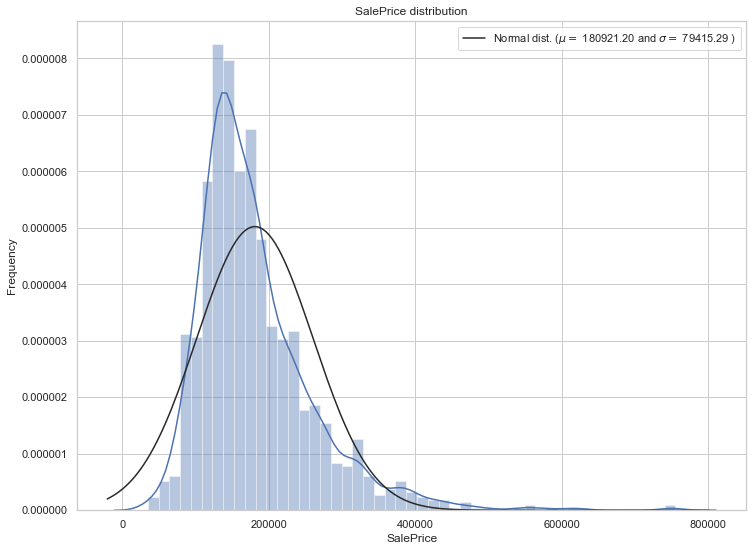

In [10]:
from scipy import stats
f, ax = plt.subplots(figsize=(12, 9))

#Check the new distribution 
sns.distplot(housedata['SalePrice'] , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(housedata['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


 mu = 12.02 and sigma = 0.40



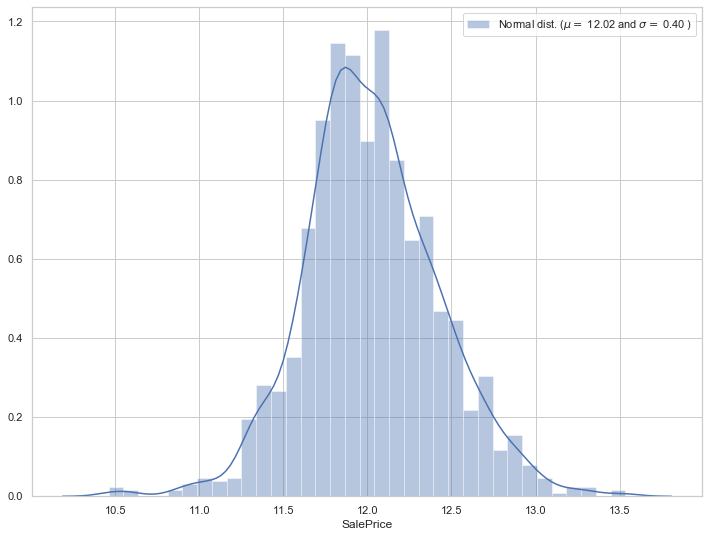

In [11]:
# Transformed SalePrice using log of Sale Price
f, ax = plt.subplots(figsize=(12, 9))
sns.distplot(np.log(housedata["SalePrice"]))
(mu, sigma) = stats.norm.fit(np.log(housedata["SalePrice"]))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

In [12]:
# transforming the log Sale Price to have normal distribution values to boost ML model performance.

housedata["TransformedSalePrice"] = np.log(housedata["SalePrice"])

housedata["TransformedSalePrice"] 

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

In [13]:
# let's get some stats on the 'SalePrice' variable
print("Statistics for the supplied house prices dataset:\n")
print("Minimum price: ${:,.2f}".format(np.min(housedata['SalePrice'])))
print("Maximum price: ${:,.2f}".format(np.max(housedata['SalePrice'])))
print("Mean price: ${:,.2f}".format(np.mean(housedata['SalePrice'])))
print("Median price ${:,.2f}".format(np.median(housedata['SalePrice'])))
print("Standard deviation of prices: ${:,.2f}".format(np.std(housedata['SalePrice'])))

Statistics for the supplied house prices dataset:

Minimum price: $34,900.00
Maximum price: $755,000.00
Mean price: $180,921.20
Median price $163,000.00
Standard deviation of prices: $79,415.29


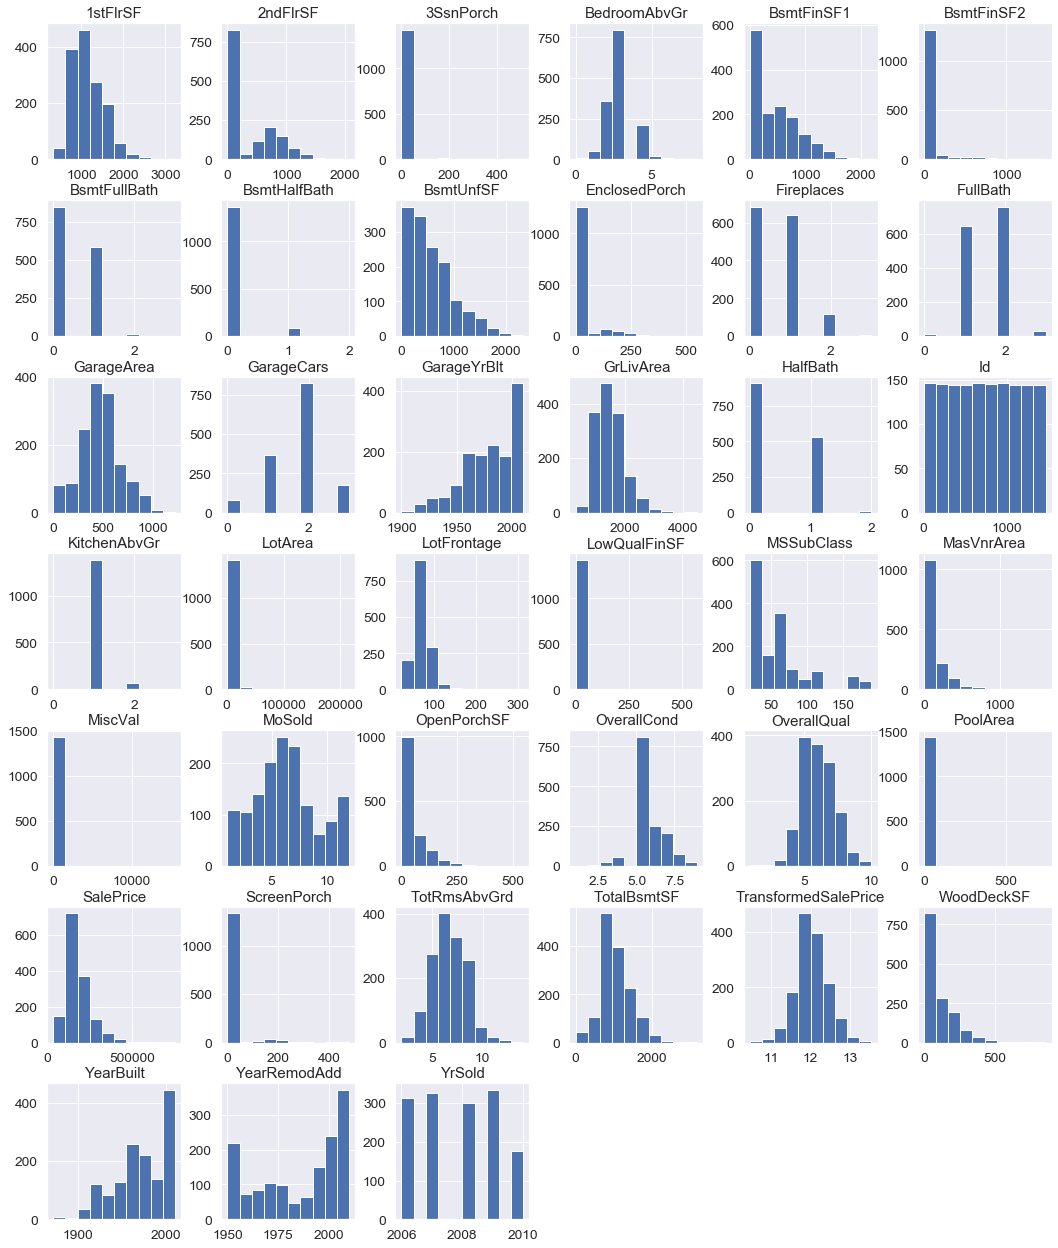

In [138]:
# histogram to show different features
housedata.hist(figsize=(18,22))
plt.show()

<a id=section5></a>
## Data Cleaning - Checking Missing values

In [15]:
# Checking missing values in dataset

#check the missing values in all columns
missingValues = housedata.isnull().sum()

#filter the columns with missing values greater than Zero
missingValues = missingValues[missingValues>0]

#arrange them in descending
missingValues.sort_values(inplace=True,ascending=False)

#Converting in to dataframe
missingValues = missingValues.to_frame()
#assign a column
missingValues.columns = ['count']
missingValues.index.names = ['Name']
missingValues['Name'] = missingValues.index
missingValues['DateType'] = missingValues['Name'].dtypes
missingValues



,count,Name,DateType
Name,,,
PoolQC,1453,PoolQC,object
MiscFeature,1406,MiscFeature,object
Alley,1369,Alley,object
Fence,1179,Fence,object
FireplaceQu,690,FireplaceQu,object
LotFrontage,259,LotFrontage,object
GarageYrBlt,81,GarageYrBlt,object
GarageType,81,GarageType,object
GarageFinish,81,GarageFinish,object


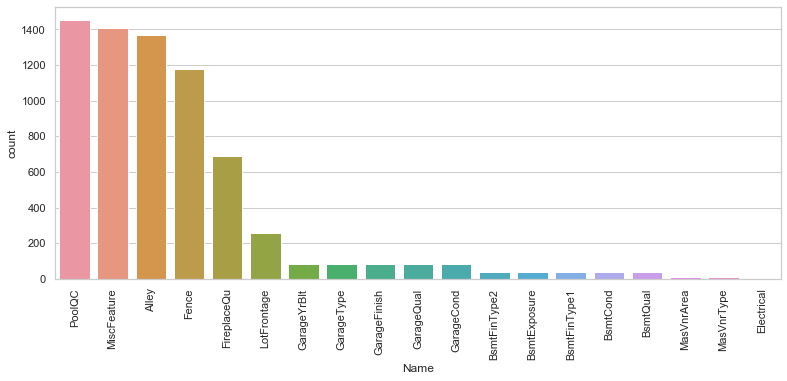

In [16]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name',y='count', data=missingValues)
plt.xticks(rotation = 90)
plt.show()

There are lot of missing or NaN values in LotFrontage,Ally,FireplaceQu,GarageType,Poolrea,Fence,MiscFeatures etc. Before replacing the 
missing values, Let us check out , which are the important variables/columns contribute to Sale Price of House.

Let us do the Co-relation of Sale Price.

<a id=section501></a>
## Handling Missing Data

In [17]:
#Handling Categorical missing values

housedata['Fence'].fillna(housedata['Fence'].mode()[0],inplace=True)
housedata['PoolQC'].fillna(housedata['PoolQC'].mode()[0],inplace=True)
housedata['MiscFeature'].fillna(housedata['PoolQC'].mode()[0],inplace=True)



In [18]:
housedata['PoolQC'].isnull().sum()

0

In [19]:
housedata.columns.nunique()

82

With 81 columns its difficult to decide which columns contribute to Sale Price more, so let us create heatmap.

<a id=section6></a>
## Feature Selection - Correlation Matrix - Heat Map 

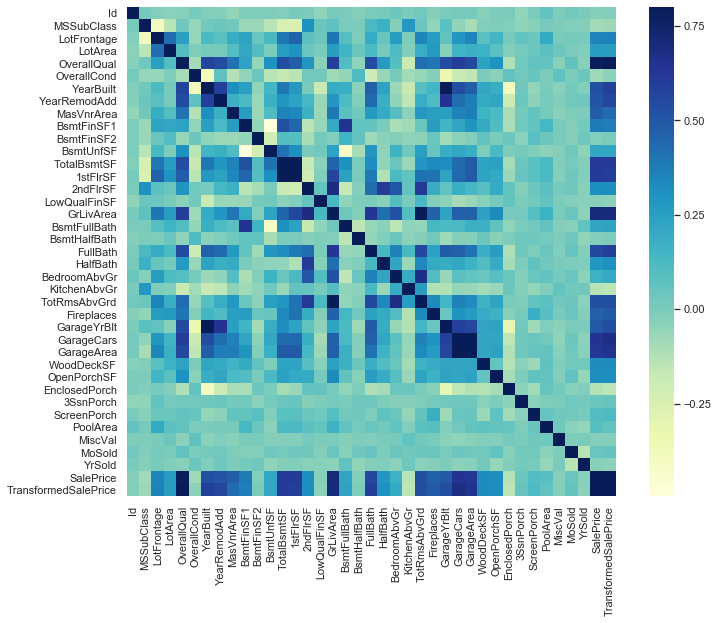

In [20]:
# Correlation Matrix Heatmap

corrmat = housedata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='YlGnBu',linecolor ='black');

In [21]:
#Correlation of SalePrice of House with other variables
correlations = housedata.corr()
correlations = correlations["SalePrice"].sort_values(ascending=False)
correlations

SalePrice               1.000000
TransformedSalePrice    0.948374
OverallQual             0.790982
GrLivArea               0.708624
GarageCars              0.640409
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
FullBath                0.560664
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
YearRemodAdd            0.507101
GarageYrBlt             0.486362
MasVnrArea              0.477493
Fireplaces              0.466929
BsmtFinSF1              0.386420
LotFrontage             0.351799
WoodDeckSF              0.324413
2ndFlrSF                0.319334
OpenPorchSF             0.315856
HalfBath                0.284108
LotArea                 0.263843
BsmtFullBath            0.227122
BsmtUnfSF               0.214479
BedroomAbvGr            0.168213
ScreenPorch             0.111447
PoolArea                0.092404
MoSold                  0.046432
3SsnPorch               0.044584
BsmtFinSF2             -0.011378
BsmtHalfBa

The above list shows the correlation of SalePrice with other variables in descending order, OverallQual,GrLiveArea,Garagecars,
GarageArea,TotalBsmtSF,1stFlrSF are the influencer contributer to SalePrice of House.

There is negative correlation exists with EnclisedPorch,KitchenAbvGr,MSSubClass,Id,MiscVal. As these are not impacting the Sale Price
of House and can be ommitted.

Selecting the Top 10 independent variables to predict Dependent Sale Price

<a id=section601></a>
## Selecting Highly Correlated features

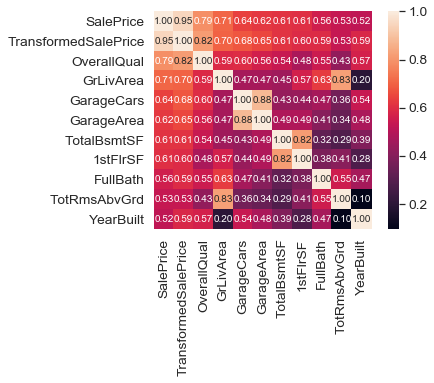

In [22]:
# Top 10 Heatmap
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housedata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

This heatmap dispalys the top 10 features variables relation with SalePrice.

In [23]:
# Displaying the top 10 feature list

features = corrmat.nlargest(11,'SalePrice')['SalePrice'].index
features

Index(['SalePrice', 'TransformedSalePrice', 'OverallQual', 'GrLivArea',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
       'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

These are the top 10 feature list for our House Price regression model creation

- __OverallQual__: Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)
- __GrLivArea__: Above grade (ground) living area square feet
- __GarageCars__: Size of garage in car capacity
- __GarageArea__: Size of garage in square feet
- __TotalBsmtSF__: Total square feet of basement area
- __1stFlrSF__: First Floor square feet
- __FullBath__: Full bathrooms above grade
- __TotRmsAbvGrd__: Total rooms above grade (does not include bathrooms)
- __YearBuilt__ : Original construction date
- __YearRemodAdd__ :Remodel date

<a id=section7></a>
## Check for Null or missing values in feature selected.

In [24]:
housedata['OverallQual'].isnull().sum()
housedata['GrLivArea'].isnull().sum()
housedata['GarageCars'].isnull().sum()
housedata['GarageArea'].isnull().sum()
housedata['TotalBsmtSF'].isnull().sum()
housedata['1stFlrSF'].isnull().sum()
housedata['FullBath'].isnull().sum()
housedata['TotRmsAbvGrd'].isnull().sum()
housedata['YearBuilt'].isnull().sum()
housedata['YearRemodAdd'].isnull().sum()

0

Let us Check how each feature related to Sale Price.

<a id=section701></a>
## OverallQual Vs SalePrice

The below boxplot shows the positive correlation between Overall quality of the contruction and its Sale Price. As the quality
increases, the price of house also increases, its show the average price of house with overall quality as 10 is approx 4 lac dollars
where as house with overall quality as 8 and 9 has average saleprice of 2.8 to 3.3 lac dollars.

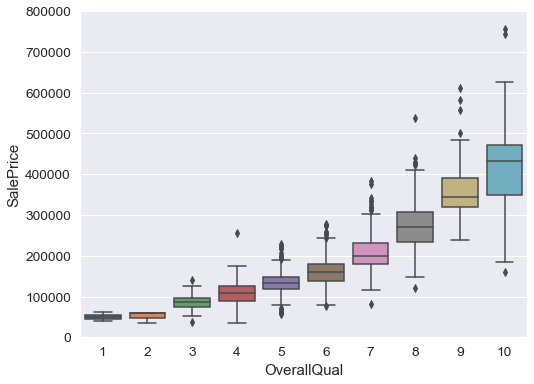

In [25]:
# Overall Quality vs Sale Price
var = 'OverallQual'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

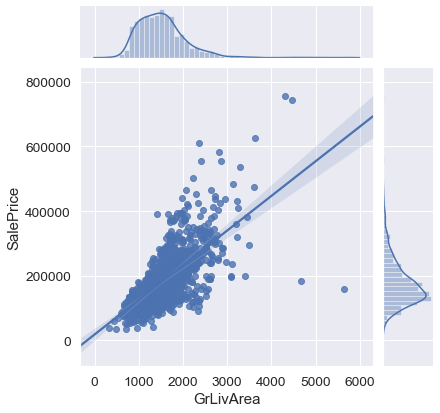

In [26]:
# Living Area Vs SalePrice

var = 'GrLivArea'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
sns.jointplot(x=housedata['GrLivArea'], y=housedata['SalePrice'], kind='reg')


# Removing Outlier 
There are two data points at the right botton, which means SalePrice decreases with the Living Area greater than 4000 sq. ft.
Let us remove this outlier to improve model performance.

In [27]:
# Removing outliers manually (Two points in the bottom right)
housedata = housedata.drop(housedata[(housedata['GrLivArea']>4000) 
                         & (housedata['SalePrice']<300000)].index).reset_index(drop=True)

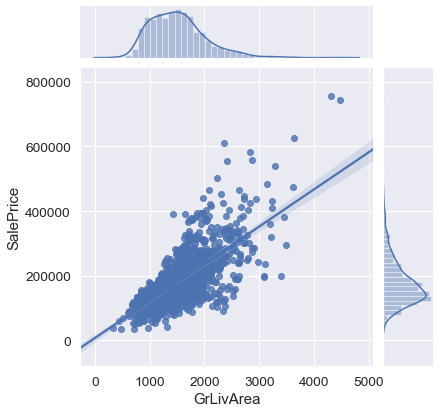

In [28]:
# Living Area Vs SalePrice after removing outlier

var = 'GrLivArea'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
sns.jointplot(x=housedata['GrLivArea'], y=housedata['SalePrice'], kind='reg')

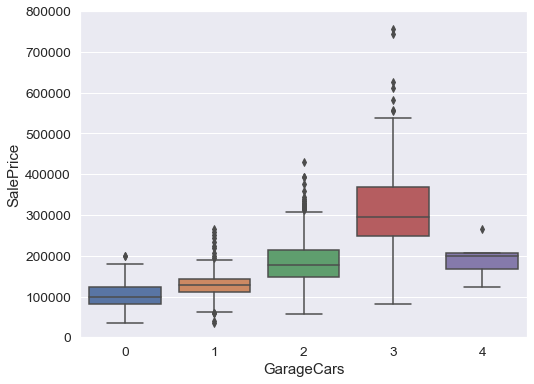

In [29]:
# GarageCars Vs SalePrice
var = 'GarageCars'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [30]:
# Removing outliers manually (house with 4 cars Garage capacity)
housedata = housedata.drop(housedata[(housedata['GarageCars']>3) 
                         & (housedata['SalePrice']<300000)].index).reset_index(drop=True)

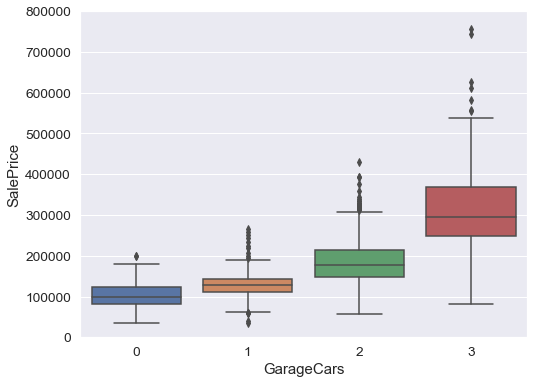

In [31]:
# GarageCars Vs SalePrice after removing outlier
var = 'GarageCars'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

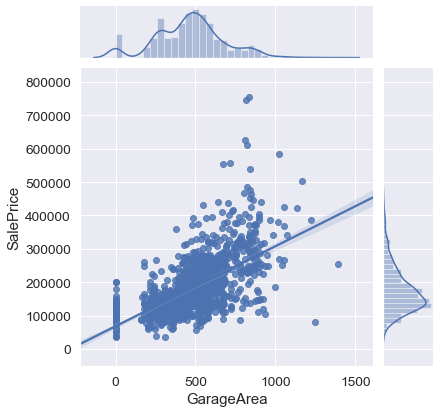

In [32]:
# GarageArea Vs SalePrice

var = 'GarageArea'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
sns.jointplot(x=housedata['GarageArea'], y=housedata['SalePrice'], kind='reg')

In [33]:
# Removing outliers manually (Bottom two datapoints)
housedata = housedata.drop(housedata[(housedata['GarageArea']>1000) 
                         & (housedata['SalePrice']<300000)].index).reset_index(drop=True)

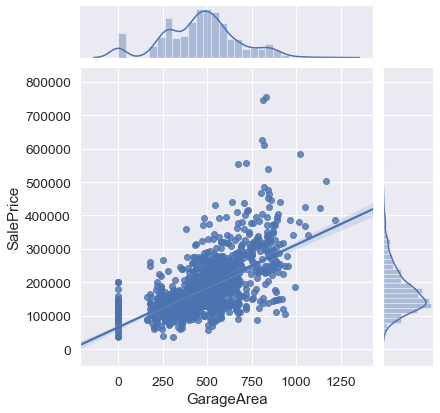

In [34]:
# GarageArea Vs SalePrice

var = 'GarageArea'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
sns.jointplot(x=housedata['GarageArea'], y=housedata['SalePrice'], kind='reg')

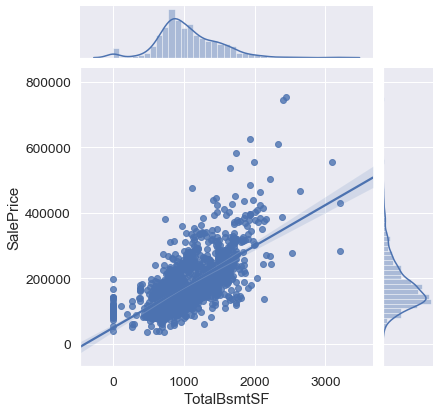

In [35]:
# TotalBsmtSF Vs Sale Price

var = 'TotalBsmtSF'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
sns.jointplot(x=housedata['TotalBsmtSF'], y=housedata['SalePrice'], kind='reg')

In [36]:
# Removing outliers manually (Bottom one datapoints)
housedata = housedata.drop(housedata[(housedata['TotalBsmtSF']>6000) 
                         & (housedata['SalePrice']<300000)].index).reset_index(drop=True)

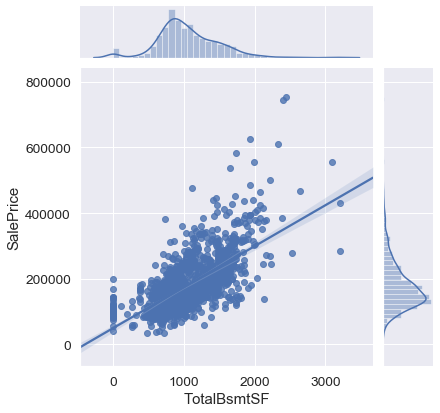

In [37]:
# TotalBsmtSF Vs Sale Price after removing outlier

var = 'TotalBsmtSF'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
sns.jointplot(x=housedata['TotalBsmtSF'], y=housedata['SalePrice'], kind='reg')

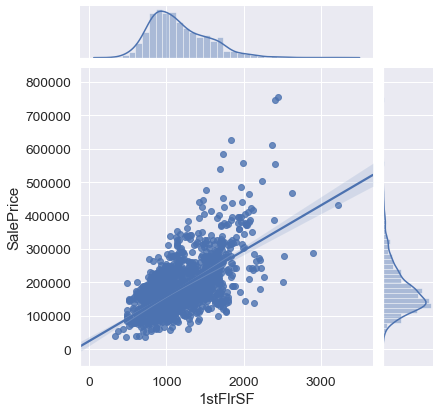

In [38]:
# # 1stFlrSF Vs Sale Price after removing outlier

var = '1stFlrSF'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
sns.jointplot(x=housedata['1stFlrSF'], y=housedata['SalePrice'], kind='reg')

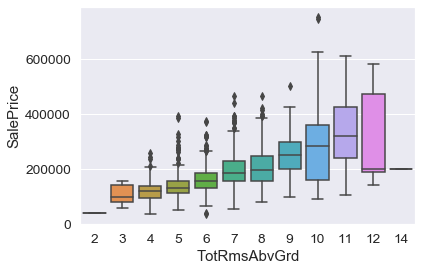

In [39]:
# Total Rooms vs Sale Price
sns.boxplot(x=housedata['TotRmsAbvGrd'], y=housedata['SalePrice'])

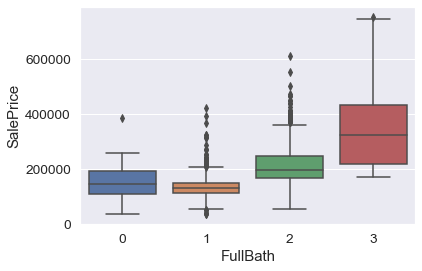

In [40]:
# FullBath vs Sale Price
sns.boxplot(x=housedata['FullBath'], y=housedata['SalePrice'])

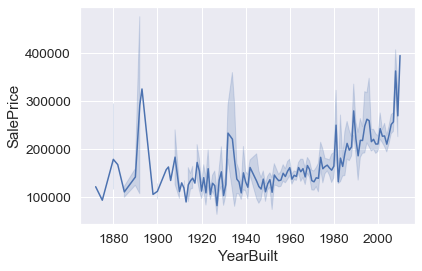

In [41]:
# YearBuilt vs Sale Price
sns.lineplot(x=housedata['YearBuilt'], y=housedata['SalePrice'])

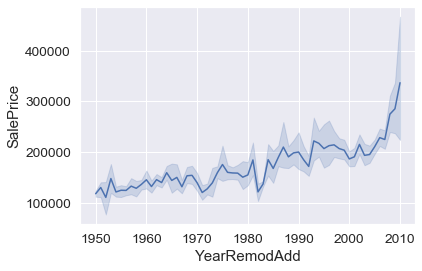

In [42]:
# Remodal vs Sale Price
sns.lineplot(x=housedata['YearRemodAdd'], y=housedata['SalePrice'])

<a id=section8></a>
## Modeling and Prediction

### Creating Model with 10 significant feature variables

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Linear Regression

Let us create Linear Regression Model

### Defining the Training and Testing dataset

In our dataset, TransformedSalePrice would be our __Target Variable__ or predictor y and in rests of the dataset, we eliminate
Id,Saleprice,TransformedSalePrice from housedata to make it X dataset or the independent variable set.


In [44]:
data = pd.DataFrame([housedata['OverallQual'],housedata['GrLivArea'],housedata['GarageCars'],housedata['GarageArea'],
                      housedata['TotalBsmtSF'],housedata['1stFlrSF'],housedata['FullBath'],housedata['TotRmsAbvGrd'],
                      housedata['YearBuilt'],housedata['YearRemodAdd'],housedata['SalePrice']])
data=data.transpose()
data

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500
2,7,1786,2,608,920,920,2,6,2001,2002,223500
3,7,1717,3,642,756,961,1,7,1915,1970,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,250000
5,5,1362,2,480,796,796,1,5,1993,1995,143000
6,8,1694,2,636,1686,1694,2,7,2004,2005,307000
7,7,2090,2,484,1107,1107,2,7,1973,1973,200000
8,7,1774,2,468,952,1022,2,8,1931,1950,129900
9,5,1077,1,205,991,1077,1,5,1939,1950,118000


## Standardization.
Standardize features by removing the mean and scaling to unit standard deviation.

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)
data = pd.DataFrame(data1)
data.head()
data.columns=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','SalePrice']
data.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,0.661065,0.397698,0.334878,0.385621,-0.470628,-0.811991,0.793449,0.930740,1.056039,0.881804,0.348994
1,-0.067969,-0.486671,0.334878,-0.039936,0.507128,0.279317,0.793449,-0.311391,0.159394,-0.426595,0.009528
2,0.661065,0.547724,0.334878,0.675774,-0.316499,-0.639962,0.793449,-0.311391,0.989621,0.833345,0.537586
3,0.661065,0.411516,1.696964,0.840194,-0.711455,-0.529756,-1.024453,0.309675,-1.866358,-0.717351,-0.512243
4,1.390099,1.361028,1.696964,1.778354,0.225361,-0.035174,0.793449,1.551806,0.956412,0.736426,0.870765


In [46]:
X_train = data.drop(['SalePrice'],axis=1)
y_train = data["SalePrice"].values

X_train


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,0.661065,0.397698,0.334878,0.385621,-0.470628,-0.811991,0.793449,0.930740,1.056039,0.881804
1,-0.067969,-0.486671,0.334878,-0.039936,0.507128,0.279317,0.793449,-0.311391,0.159394,-0.426595
2,0.661065,0.547724,0.334878,0.675774,-0.316499,-0.639962,0.793449,-0.311391,0.989621,0.833345
3,0.661065,0.411516,1.696964,0.840194,-0.711455,-0.529756,-1.024453,0.309675,-1.866358,-0.717351
4,1.390099,1.361028,1.696964,1.778354,0.225361,-0.035174,0.793449,1.551806,0.956412,0.736426
5,-0.797003,-0.289267,0.334878,0.056781,-0.615124,-0.973268,-1.024453,-0.932456,0.723948,0.494130
6,1.390099,0.366113,0.334878,0.811178,1.528234,1.440511,0.793449,0.309675,1.089248,0.978723
7,0.661065,1.147832,0.334878,0.076125,0.133847,-0.137316,0.793449,0.309675,0.059767,-0.571973
8,0.661065,0.524036,0.334878,-0.001249,-0.239435,-0.365791,0.793449,0.930740,-1.335013,-1.686535
9,-0.797003,-0.851868,-1.027209,-1.273085,-0.145512,-0.217954,-1.024453,-0.932456,-1.069341,-1.686535


### Splitting into Validation data

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

In [48]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_) 

#predicting the y_train values
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test) 
y_pred_test

Intercept: -0.002495328942814205
Coefficients: [ 0.31240651  0.42057732  0.03791865  0.07075779  0.19530307  0.04384578
 -0.06636891 -0.03714687  0.10731966  0.07510582]


array([ 0.64969932, -3.02476201,  0.43216583, -0.84718212, -0.21211408,
       -1.04475299, -0.34842771, -0.40988635, -1.1204559 ,  0.62503014,
       -0.483085  , -0.6436857 , -0.22560435, -0.70053425, -0.75950569,
        1.9277988 , -0.12709225, -1.33631499,  0.61613015, -0.70635081,
       -1.03902189, -0.76662541,  1.86506267, -0.7374412 , -0.44640201,
       -0.13082035,  0.4370077 , -0.77199805,  1.1153553 , -0.45363586,
        1.55680259, -0.8579487 , -0.1981825 ,  0.6456274 , -0.38840239,
        0.13854017, -0.76226855,  1.66298341,  0.08982955, -0.74471411,
       -0.04609516, -0.24883124, -1.23615264, -0.97380039, -1.72442929,
       -0.92926206,  0.26882613, -0.82898187,  0.1648484 ,  0.24710567,
       -0.37631864, -0.09033012,  2.31719045, -0.23188272,  0.71325049,
        0.04203116, -1.16038918, -0.65379318,  0.52087075,  0.35690935,
        0.82665185,  0.10430485, -0.17385874,  0.83048781, -1.15014215,
       -0.64066463, -1.03492521, -0.11845515, -0.29793239, -0.12

<a id=section9></a>
## Model Evaulation 

### Mean Absolute Error MAE

In [49]:
#Model Evaulation
from sklearn.metrics import mean_absolute_error

MAE_train1 = mean_absolute_error(y_train, y_pred_train)
MAE_test1 = mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train1))
print('MAE for test set is {}'.format(MAE_test1))

MAE for training set is 0.296981766338777
MAE for test set is 0.2789013545178913


### Mean Square Error MSE

In [50]:
#MSE
from sklearn import metrics

MSE_train1 = mean_squared_error(y_train, y_pred_train)
MSE_test1 = mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train1))
print('MSE for test set is {}'.format(MSE_test1))

MSE for training set is 0.18289929481896997
MSE for test set is 0.16373690890609321


### Root Mean Square Error RMSE

In [51]:
from sklearn import metrics

RMSE_train1 = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train1))
print('RMSE for test set is {}'.format(RMSE_test1))

RMSE for training set is 0.42766727115711106
RMSE for test set is 0.40464417567301425


### R2 Score

In [52]:
#R2 Score
from sklearn import metrics

r2_train1 = r2_score(y_train, y_pred_train)
r2_test1 = r2_score(y_test, y_pred_test)

print('MSE for training set is {}'.format(r2_train1))
print('MSE for test set is {}'.format(r2_test1))

MSE for training set is 0.8149576496406159
MSE for test set is 0.842791307890455


## Linear Regression GridSearchCV

In [53]:
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(linreg, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg.fit(X_train, y_train)
best_score1 = grid_linreg.best_score_

print("Best LinReg Model: " + str(grid_linreg.best_estimator_))
print("Best Score: " + str(grid_linreg.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best LinReg Model: LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)
Best Score: 0.8078997443743456


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished


### Model Evalution  - R2 Score and RMSE

In [54]:
from sklearn.metrics import mean_squared_error

linreg = grid_linreg.best_estimator_
linreg.fit(X_train, y_train)
lin_pred = linreg.predict(X_test)
lin_pred

r2_lin = r2_score(y_test, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_test, lin_pred))
print("R^2 Score: " + str(r2_lin))
print('RMSE for test set is {}'.format(rmse_lin))

R^2 Score: 0.8428574815046126
RMSE for test set is 0.4045590035824578


In [55]:
scores_lin = cross_val_score(linreg, X_train, y_train, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)*100))

Cross Validation Score: 80.16406167884794


## Random Forest Regressor

In [56]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [57]:
#Fit
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [58]:
y_pred_test = model.predict(X_test)
y_pred_test

array([ 2.30098452e-01, -1.48906027e+00,  2.11116407e-01, -6.84030191e-01,
       -3.07827705e-01, -8.81630079e-01, -5.70737487e-01, -3.23854459e-01,
       -8.81625477e-01,  5.17274745e-01, -5.63745291e-01, -4.52831774e-01,
       -4.96057605e-01, -5.77885308e-01, -6.13698987e-01,  1.61824159e+00,
       -2.79340482e-01, -1.00257044e+00,  1.59028761e-01, -6.53752615e-01,
       -8.58473142e-01, -7.12141952e-01,  2.26121211e+00, -5.39454879e-01,
       -3.37042088e-01, -1.29723619e-01,  1.93774142e-01, -1.10847250e+00,
        9.59220659e-01, -4.02527510e-01,  1.91900361e+00, -7.28797409e-01,
       -4.63890892e-01,  4.81014782e-01, -3.71481573e-01, -5.00905597e-02,
       -5.90696457e-01,  1.86159350e+00, -2.65885644e-01, -4.39433262e-01,
       -3.26423597e-01, -2.10250553e-01, -9.19774540e-01, -8.27339359e-01,
       -1.10656001e+00, -8.15713296e-01, -5.80473037e-02, -8.44974890e-01,
       -5.30717703e-02, -2.12370276e-01, -4.85746179e-01, -9.79480996e-02,
        2.25265945e+00, -

### Model Evalution - MAE, MSE,RMSE,R2 Score, Accuracy

### MAE

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MAE_random2 = mean_absolute_error(y_test, y_pred_test)

print("Mean Absolute error for Random Forest Regresssion is: {}".format(MAE_random2))

Mean Absolute error for Random Forest Regresssion is: 0.22669956876533048


### MSE

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE_random2 = mean_squared_error(y_test, y_pred_test)

print("Mean Square error for Random Forest Regresssion is: {}".format(MSE_random2))

Mean Square error for Random Forest Regresssion is: 0.11833956717122887


### RMSE

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

RMSE_random2 = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Root Mean square error for Random Forest Regresssion is: {}".format(RMSE_random2))

Root Mean square error for Random Forest Regresssion is: 0.3440051848028295


#### R2 Score

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_random2 = r2_score(y_test, y_pred_test)

print("R2 score for Random Forest Regresssion is: {}".format(r2_random2))

R2 score for Random Forest Regresssion is: 0.8863786503355309


### Accuracy

In [63]:
#Score/Accuracy
acc1 = model.score(X_test, y_test)*100
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  88.63786503355308


## GradientBoostingRegressor

In [64]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [65]:
#Fit
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [66]:
print("Accuracy --> ", GBR.score(X_test, y_test)*100)

Accuracy -->  90.83060900293117


# Adding some more variables to improve the model.

### Creating Model with 15 significant feature variables

In [67]:
dataNew = pd.DataFrame([housedata['OverallQual'],housedata['GrLivArea'],housedata['GarageCars'],housedata['GarageArea'],
                      housedata['TotalBsmtSF'],housedata['1stFlrSF'],housedata['FullBath'],housedata['TotRmsAbvGrd'],
                      housedata['YearBuilt'],housedata['YearRemodAdd'],housedata['BsmtFinSF1'],housedata['LotFrontage'],
                      housedata['BsmtFullBath'],housedata['LotArea'],housedata['SalePrice']])

dataNew=dataNew.transpose()
dataNew


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,BsmtFinSF1,LotFrontage,BsmtFullBath,LotArea,SalePrice
0,7.0,1710.0,2.0,548.0,856.0,856.0,2.0,8.0,2003.0,2003.0,706.0,65.0,1.0,8450.0,208500.0
1,6.0,1262.0,2.0,460.0,1262.0,1262.0,2.0,6.0,1976.0,1976.0,978.0,80.0,0.0,9600.0,181500.0
2,7.0,1786.0,2.0,608.0,920.0,920.0,2.0,6.0,2001.0,2002.0,486.0,68.0,1.0,11250.0,223500.0
3,7.0,1717.0,3.0,642.0,756.0,961.0,1.0,7.0,1915.0,1970.0,216.0,60.0,1.0,9550.0,140000.0
4,8.0,2198.0,3.0,836.0,1145.0,1145.0,2.0,9.0,2000.0,2000.0,655.0,84.0,1.0,14260.0,250000.0
5,5.0,1362.0,2.0,480.0,796.0,796.0,1.0,5.0,1993.0,1995.0,732.0,85.0,1.0,14115.0,143000.0
6,8.0,1694.0,2.0,636.0,1686.0,1694.0,2.0,7.0,2004.0,2005.0,1369.0,75.0,1.0,10084.0,307000.0
7,7.0,2090.0,2.0,484.0,1107.0,1107.0,2.0,7.0,1973.0,1973.0,859.0,NaN,1.0,10382.0,200000.0
8,7.0,1774.0,2.0,468.0,952.0,1022.0,2.0,8.0,1931.0,1950.0,0.0,51.0,0.0,6120.0,129900.0
9,5.0,1077.0,1.0,205.0,991.0,1077.0,1.0,5.0,1939.0,1950.0,851.0,50.0,1.0,7420.0,118000.0


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(dataNew)
data12 = scaler.transform(dataNew)
data1 = pd.DataFrame(data12)
data1.head()
data1.columns=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','BsmtFinSF1',
               'LotFrontage','BsmtFullBath','LotArea','SalePrice']
data1.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,BsmtFinSF1,LotFrontage,BsmtFullBath,LotArea,SalePrice
0,0.661065,0.397698,0.334878,0.385621,-0.470628,-0.811991,0.793449,0.930740,1.056039,0.881804,0.615875,-0.201763,1.116063,-0.201713,0.348994
1,-0.067969,-0.486671,0.334878,-0.039936,0.507128,0.279317,0.793449,-0.311391,0.159394,-0.426595,1.245188,0.444705,-0.821658,-0.085198,0.009528
2,0.661065,0.547724,0.334878,0.675774,-0.316499,-0.639962,0.793449,-0.311391,0.989621,0.833345,0.106872,-0.072470,1.116063,0.081976,0.537586
3,0.661065,0.411516,1.696964,0.840194,-0.711455,-0.529756,-1.024453,0.309675,-1.866358,-0.717351,-0.517814,-0.417252,1.116063,-0.090264,-0.512243
4,1.390099,1.361028,1.696964,1.778354,0.225361,-0.035174,0.793449,1.551806,0.956412,0.736426,0.497879,0.617096,1.116063,0.386943,0.870765


# Handling Null values in LotFrontage

In [69]:
averageMean = np.mean(data1['LotFrontage'])
averageMean = 5.082302

data1['LotFrontage'].fillna(averageMean,inplace=True)

data1['LotFrontage'].isnull().sum()


0

In [70]:
X_train_new = data1.drop(['SalePrice'],axis=1)
y_train_new = data1['SalePrice']

X_train_new

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,BsmtFinSF1,LotFrontage,BsmtFullBath,LotArea
0,0.661065,0.397698,0.334878,0.385621,-0.470628,-0.811991,0.793449,0.930740,1.056039,0.881804,0.615875,-0.201763,1.116063,-0.201713
1,-0.067969,-0.486671,0.334878,-0.039936,0.507128,0.279317,0.793449,-0.311391,0.159394,-0.426595,1.245188,0.444705,-0.821658,-0.085198
2,0.661065,0.547724,0.334878,0.675774,-0.316499,-0.639962,0.793449,-0.311391,0.989621,0.833345,0.106872,-0.072470,1.116063,0.081976
3,0.661065,0.411516,1.696964,0.840194,-0.711455,-0.529756,-1.024453,0.309675,-1.866358,-0.717351,-0.517814,-0.417252,1.116063,-0.090264
4,1.390099,1.361028,1.696964,1.778354,0.225361,-0.035174,0.793449,1.551806,0.956412,0.736426,0.497879,0.617096,1.116063,0.386943
5,-0.797003,-0.289267,0.334878,0.056781,-0.615124,-0.973268,-1.024453,-0.932456,0.723948,0.494130,0.676030,0.660194,1.116063,0.372252
6,1.390099,0.366113,0.334878,0.811178,1.528234,1.440511,0.793449,0.309675,1.089248,0.978723,2.149826,0.229215,1.116063,-0.036160
7,0.661065,1.147832,0.334878,0.076125,0.133847,-0.137316,0.793449,0.309675,0.059767,-0.571973,0.969864,5.082302,1.116063,-0.005968
8,0.661065,0.524036,0.334878,-0.001249,-0.239435,-0.365791,0.793449,0.930740,-1.335013,-1.686535,-1.017562,-0.805133,-0.821658,-0.437784
9,-0.797003,-0.851868,-1.027209,-1.273085,-0.145512,-0.217954,-1.024453,-0.932456,-1.069341,-1.686535,0.951355,-0.848231,1.116063,-0.306071


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_new, y_train_new, test_size=0.20, random_state=1)

y_train

1420   -1.461489
1094   -0.575107
215    -0.582022
135    -0.084768
867    -0.600252
432     0.392999
616     0.745037
1328    0.242125
503     0.430717
620    -0.260787
462    -0.025173
1350   -0.953548
920     1.310813
195    -0.405374
558    -0.914572
375     2.002316
680     0.336421
1078   -0.424233
1229   -0.480811
1394   -0.600252
311    -0.764956
930     0.052276
401     0.971347
741     0.694746
58      3.244257
1131   -0.461951
819     2.568092
239    -0.851708
1123   -1.096877
812    -0.323651
          ...   
141     0.996493
1110   -0.512243
753     1.373677
1001   -1.166028
1239   -0.644257
580     2.378243
562     1.813724
398     0.814187
668     0.965061
252    -0.097340
907    -0.449379
468     0.116397
914     0.254698
357     1.247949
1278    0.116397
1300    1.939452
1202   -0.210496
1305    0.328877
1414    1.134793
508     0.275632
749    -0.103627
129    -0.386515
144    -0.700834
960    -0.260787
847    -0.285932
715     1.185085
905    -0.468238
1096   -0.9397

# Applying Linear Regression again

In [72]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_) 

#predicting the y_train values
y_pred_train1 = linreg.predict(X_train)  
y_pred_test1 = linreg.predict(X_test) 
y_pred_test1

Intercept: -0.0036556447484939764
Coefficients: [ 0.33214256  0.37125171  0.04707467  0.05412449  0.13794031  0.02275438
 -0.0474829  -0.00274931  0.08998656  0.08149132  0.135394    0.00066935
 -0.00421365  0.07252017]


array([ 4.75104130e-01, -3.06371296e+00,  2.35535881e-01, -9.78976247e-01,
       -5.76800632e-02, -1.14798612e+00, -3.32440054e-01, -4.19470186e-01,
       -1.01150535e+00,  5.66976684e-01, -5.05561252e-01, -6.54170633e-01,
       -1.96088467e-01, -5.54309073e-01, -6.78272578e-01,  1.91042778e+00,
       -1.11642868e-01, -1.30060013e+00,  7.04181377e-01, -7.53120728e-01,
       -1.08337205e+00, -6.13597772e-01,  2.32480249e+00, -6.59285503e-01,
       -6.71119321e-01, -3.79534076e-03,  2.04016253e-01, -8.52603206e-01,
        1.31915302e+00, -3.65164098e-01,  1.75269438e+00, -8.49305502e-01,
       -3.61746429e-01,  6.79626422e-01, -2.55756492e-01,  1.56631122e-02,
       -6.11922657e-01,  1.83278972e+00,  1.19394549e-01, -7.22139088e-01,
       -6.62872497e-02, -2.58505581e-01, -1.30141930e+00, -1.10664104e+00,
       -1.76727496e+00, -9.33106645e-01,  8.02104967e-02, -9.51526113e-01,
        1.96784072e-02,  2.59704906e-01, -4.48626299e-01, -4.56637739e-02,
        2.81474441e+00, -

# Model Evaluation 

### MAE

In [73]:
#Model Evaulation
from sklearn.metrics import mean_absolute_error

MAE_train_new3 = mean_absolute_error(y_train, y_pred_train1)
MAE_test_new3 = mean_absolute_error(y_test, y_pred_test1)

print('MAE for training set is {}'.format(MAE_train_new3))
print('MAE for test set is {}'.format(MAE_test_new3))

MAE for training set is 0.2758959040461792
MAE for test set is 0.2566086261674905


### MSE

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE_random3 = mean_squared_error(y_test, y_pred_test1)

print("Mean Square error for Random Forest Regresssion is: {}".format(MSE_random3))

Mean Square error for Random Forest Regresssion is: 0.13499331774292506


### RMSE

In [75]:
# Check for RMSE 

from sklearn import metrics

RMSE_train_new3 = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train1))
RMSE_test_new3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test1))

print('RMSE for training set is {}'.format(RMSE_train_new3))
print('RMSE for test set is {}'.format(RMSE_test_new3))

RMSE for training set is 0.40368693685705964
RMSE for test set is 0.36741436790485626


### R2 Score

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_random3 =r2_score(y_test, y_pred_test1)

print("Mean Square error for Random Forest Regresssion is: {}".format(r2_random3))

Mean Square error for Random Forest Regresssion is: 0.8703888874678534


# Linear Regression with Grid Search

In [77]:
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg_new = GridSearchCV(linreg, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg_new.fit(X_train, y_train)
best_score2=grid_linreg_new.best_score_
print("Best LinReg Model: " + str(grid_linreg_new.best_estimator_))
print("Best Score: " + str(grid_linreg_new.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best LinReg Model: LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)
Best Score: 0.825103057333696


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished


We get improved best score(0.825103) with GridSearchCV as compared with the previous model(0.807899). 

### Model Evalution - R2 score and RMSE in GridSearchCV

In [78]:
# Let us look at the RMSE and R2 score

from sklearn.metrics import mean_squared_error

linreg = grid_linreg_new.best_estimator_
linreg.fit(X_train, y_train)
lin_pred = linreg.predict(X_test)
lin_pred

r2_lin1 = r2_score(y_test, lin_pred)
rmse_lin1 = np.sqrt(mean_squared_error(y_test, lin_pred))
print("R^2 Score: " + str(r2_lin1))
print('RMSE for test set is {}'.format(rmse_lin1))

R^2 Score: 0.8705431747122282
RMSE for test set is 0.36719562034045244


Our RMSE score also reduced from 0.404559 to  0.367195 and it is significant improvement over model. and R2 score increases from 0.842857 to 0.87054 as compared with previous X_train.

In [79]:
# Le us check out Cross Validation score

scores_lin = cross_val_score(linreg, X_train, y_train, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)*100))

Cross Validation Score: 82.35155836285499


### Cross validation score also get improved from 80.16406167884794 to current model  82.35155836285499

# Random Forest for Regression problem

In [80]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [81]:
#Fit
model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [82]:
y_pred_test2 = model.predict(X_test)
y_pred_test2

array([ 1.45891474e-01, -1.52707012e+00,  1.56656815e-01, -7.63320176e-01,
       -3.17736073e-01, -8.79368937e-01, -5.12034634e-01, -3.31198134e-01,
       -7.92866028e-01,  5.99964174e-01, -5.57269635e-01, -4.81778884e-01,
       -4.16327396e-01, -5.55495581e-01, -6.14425318e-01,  1.64775894e+00,
       -2.65655801e-01, -9.59970479e-01,  3.62997687e-01, -6.26513745e-01,
       -8.49970049e-01, -6.35809465e-01,  2.78882870e+00, -5.28707152e-01,
       -4.56937873e-01,  1.18336438e-02,  1.34687593e-01, -1.11046551e+00,
        1.51512077e+00, -3.81168534e-01,  2.32096154e+00, -6.30547122e-01,
       -4.85765478e-01,  5.19335451e-01, -3.15121275e-01, -2.12525057e-02,
       -5.48601411e-01,  2.03276048e+00, -2.53144186e-01, -5.75248693e-01,
       -3.20480713e-01,  4.06524111e-02, -9.90113576e-01, -8.98831559e-01,
       -1.10999562e+00, -8.26532274e-01, -9.05135746e-02, -8.49905349e-01,
       -6.35942799e-02,  7.35444367e-02, -3.27980888e-01, -1.11175315e-01,
        2.41750843e+00, -

### Model Evalution - MAE, MSE,RMSE,R2 Score, Accuracy

### MAE

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MAE_random4 = mean_absolute_error(y_test, y_pred_test2)

print("Mean Absolute error for Random Forest Regresssion is: {}".format(MAE_random4))

Mean Absolute error for Random Forest Regresssion is: 0.20969495633221788


### MSE

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE_random4 = mean_squared_error(y_test, y_pred_test2)

print("Mean Square error for Random Forest Regresssion is: {}".format(MSE_random4))

Mean Square error for Random Forest Regresssion is: 0.10393981487034806


### RMSE

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

RMSE_random4 = np.sqrt(mean_squared_error(y_test, y_pred_test2))

print("Root Mean Square error for Random Forest Regresssion is: {}".format(RMSE_random4))

Root Mean Square error for Random Forest Regresssion is: 0.32239698334560773


### R2 Score

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

R2_random4 = r2_score(y_test, y_pred_test2)

print("Root Mean Square error for Random Forest Regresssion is: {}".format(R2_random4))

Root Mean Square error for Random Forest Regresssion is: 0.9002042822046485


### Accuracy

In [87]:
#Score/Accuracy
acc2 = model.score(X_test, y_test)*100
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  90.02042822046486


## Accuracy of the model significantly increase from 88% to 90%

# GradientBoostingRegressor

In [88]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR_new = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [89]:
#Fit
GBR_new.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [90]:
print("Accuracy --> ", GBR_new.score(X_test, y_test)*100)

Accuracy -->  92.54446970228636


### With GradientBoostingRegressor the accuracy of the model increases to 92%. We can consider this a very good model for predicting house Sale prices.

# Let us re- model it using categorical variables

### Creating Model with 240 significant feature variables - including alll numerical and categorical features
### to predict the values

In [157]:
# Consider categorical features

housedata.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [92]:
housedata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [93]:
# delete the ID and SalePrice as we are using TransformedSalePrice

house = housedata
house.drop(['Id','SalePrice'],axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TransformedSalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Gd,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Gd,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Gd,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Gd,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Gd,0,12,2008,WD,Normal,12.429216
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,700,10,2009,WD,Normal,11.870600
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Gd,0,8,2007,WD,Normal,12.634603
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,350,11,2009,WD,Normal,12.206073
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Gd,0,4,2008,WD,Abnorml,11.774520
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Gd,0,1,2008,WD,Normal,11.678440


### Handling the missing values

In [103]:
# Filter Columns with missing values

house.isnull().sum().sort_values(ascending=False)

Alley            1358
FireplaceQu       686
LotFrontage       258
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
Foundation          0
ExterQual           0
ExterCond           0
LotConfig           0
MSSubClass          0
BsmtFinSF1          0
RoofStyle           0
YearRemodAdd        0
YearBuilt           0
OverallCond         0
                 ... 
ScreenPorch         0
PoolArea            0
PoolQC              0
Fence               0
MiscFeature         0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
GarageArea          0
Fireplaces          0
TotalBsmtSF         0
Functional          0
Heating   

In [104]:
Deleting "Alley" and "FireplaceQu" , as they have too many missing values

SyntaxError: invalid syntax (<ipython-input-104-16fb3af13b39>, line 1)

In [105]:
house.drop(['Alley','FireplaceQu'],axis=1,inplace=True)
house.shape

(1448, 80)

In [106]:
columns_nullValues = house.columns[house.isnull().any()]
house[columns_nullValues].select_dtypes(include=['float64']).columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

Replacing the missing float values of "LotFrontage",'MasVnrArea', 'GarageYrBlt' with the mean.

In [107]:
house['LotFrontage'].fillna(house['LotFrontage'].mean(),inplace=True)
house['MasVnrArea'].fillna(house['MasVnrArea'].mean(),inplace=True)
house['GarageYrBlt'].fillna(house['GarageYrBlt'].mean(),inplace=True)

In [108]:
house['LotFrontage'].isnull().sum()

0

There is no missing value left. Now look at the object missing values, Let us replace them with the mode of the column.

In [109]:
#Column with the Object missing values
house[columns_nullValues].select_dtypes(include=['object']).columns

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

Replace with their mode

In [110]:
house['MasVnrType'].fillna(house['MasVnrType'].mode(),inplace=True)
house['BsmtQual'].fillna(house['BsmtQual'].mode(),inplace=True)
house['BsmtCond'].fillna(house['BsmtCond'].mode(),inplace=True)
house['BsmtExposure'].fillna(house['BsmtExposure'].mode(),inplace=True)
house['BsmtFinType1'].fillna(house['BsmtFinType1'].mode(),inplace=True)
house['BsmtFinType2'].fillna(house['BsmtFinType2'].mode(),inplace=True)
house['Electrical'].fillna(house['Electrical'].mode(),inplace=True)
house['GarageType'].fillna(house['GarageType'].mode(),inplace=True)
house['GarageFinish'].fillna(house['GarageFinish'].mode(),inplace=True)
house['GarageQual'].fillna(house['GarageQual'].mode(),inplace=True)
house['MasVnrType'].fillna(house['MasVnrType'].mode(),inplace=True)



### Handling Categorical Columns - Dummification

In [111]:
categorical_columns = house.select_dtypes(include=['object']).columns
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

We have 41 categorical columns in our dataset, we have to generate the dummies for them

In [112]:
# Before dummification , the shape of data
house.shape

(1448, 80)

In [113]:
house = pd.get_dummies(house, columns = categorical_columns, drop_first = True)
house.shape

(1448, 243)

There are 241 columns now in dataset

## Feature Engineering

In [114]:
X = house.loc[:,house.columns != "TransformedSalePrice"]
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [115]:
Y=house.TransformedSalePrice
Y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: TransformedSalePrice, dtype: float64

## Feature Scaling

In [116]:
X_Scaled = StandardScaler().fit(X).transform(X)
X_Scaled = pd.DataFrame(X_Scaled)
X_Scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
0,-1.728329,0.075484,-0.222563,-0.201713,0.661065,-0.520782,1.056039,0.881804,0.520490,0.615875,...,-0.058864,-0.058864,-0.297862,-0.045565,0.386272,-0.052632,-0.087492,-0.118345,0.464527,-0.301965
1,-1.725956,-0.870843,0.490549,-0.085198,-0.067969,2.172407,0.159394,-0.426595,-0.573597,1.245188,...,-0.058864,-0.058864,-0.297862,-0.045565,0.386272,-0.052632,-0.087492,-0.118345,0.464527,-0.301965
2,-1.723584,0.075484,-0.079940,0.081976,0.661065,-0.520782,0.989621,0.833345,0.330699,0.106872,...,-0.058864,-0.058864,-0.297862,-0.045565,0.386272,-0.052632,-0.087492,-0.118345,0.464527,-0.301965
3,-1.721212,0.312066,-0.460267,-0.090264,0.661065,-0.520782,-1.866358,-0.717351,-0.573597,-0.517814,...,-0.058864,-0.058864,-0.297862,-0.045565,0.386272,-0.052632,-0.087492,-0.118345,-2.152729,-0.301965
4,-1.718839,0.075484,0.680712,0.386943,1.390099,-0.520782,0.956412,0.736426,1.380130,0.497879,...,-0.058864,-0.058864,-0.297862,-0.045565,0.386272,-0.052632,-0.087492,-0.118345,0.464527,-0.301965


## Feature Selection

There are 242 features for model prediction but we want to select some significant features out of it.

We will be using PCA Principle Component Analysis 

In [139]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_features = pca.fit_transform(X_Scaled)
X_features.shape

(1448, 161)

We select the significant 161 features out of 242

## Splitting the train and test data

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y, test_size = 0.20, random_state=1)

In [142]:
X_train.shape

(1158, 161)

## Model Selection and Develop

## Linear Regression

In [143]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Prediciting the house price values

In [144]:
Y_pred_linreg = linreg.predict(X_test)
Y_pred_linreg

array([12.26150486, 10.98378135, 12.201476  , 11.67211642, 11.94873008,
       11.45411038, 14.11615805, 11.61379536, 11.68958423, 12.19774194,
       12.03095668, 11.89797347, 12.08463902, 11.65304526, 11.70917219,
       12.81114792, 12.06775109, 11.42029101, 12.29266146, 11.64774757,
       11.52299863, 11.81174425, 12.77715804, 11.82841524, 11.09245015,
       12.0216647 , 12.18071467, 11.43405443, 14.70573078, 11.96237836,
       12.7295631 , 11.75848068, 11.50479124, 12.26708915, 11.90973271,
       12.09752935, 11.7836321 , 12.66984462, 11.92431327, 11.76699979,
       11.96408035, 12.09109416, 11.46686692, 11.45830946, 10.86627334,
       11.70747552, 12.0641445 , 11.58152618, 12.00789653, 12.19418129,
       11.72863127, 12.02220883, 13.42065909, 11.98977542, 12.33436439,
       12.08993073, 11.53888102, 11.82171875, 12.20659999, 12.02629561,
       12.29316386, 12.11223429, 12.1286437 , 12.22716067, 11.54953519,
       11.66602409, 11.43403129, 11.86495153, 12.01492318, 11.99

##  Random Forest Regressor

In [145]:
from sklearn.ensemble import RandomForestRegressor

randreg = RandomForestRegressor(n_estimators=1000,
                                      max_depth=10,
                                      min_samples_split=5,
                                      min_samples_leaf=5,
                                      max_features=None,
                                      oob_score=True,
                                      random_state=42)

randreg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

#### Predicting the house price value using random forest regressor

In [146]:
Y_pred_randreg = randreg.predict(X_test)
Y_pred_randreg

array([12.2865379 , 11.28376396, 12.40030159, 11.74704865, 11.96927744,
       11.49057736, 11.86794787, 11.75064664, 11.70497555, 12.25555752,
       12.02534899, 11.8722571 , 11.98563367, 11.5389979 , 11.75452472,
       12.60813711, 12.03631419, 11.61877838, 12.24420147, 11.62154915,
       11.58985648, 11.77888591, 12.47889305, 11.81219647, 11.59833556,
       11.84902157, 12.22403708, 11.59369641, 12.4118414 , 11.95263877,
       12.56927756, 11.75537396, 11.61373664, 12.28940146, 11.80292453,
       12.10604766, 11.81075159, 12.64514647, 11.69364481, 11.85461998,
       11.90530562, 12.05503868, 11.62514683, 11.63239357, 11.25878022,
       11.75077099, 12.08781436, 11.68816946, 12.03974306, 12.30482562,
       11.79481882, 12.13224932, 12.91681202, 12.02966797, 12.30710533,
       12.10779611, 11.66577353, 11.76907038, 12.22259086, 12.02088958,
       12.34258673, 12.18390613, 12.15935848, 12.25665068, 11.74830288,
       11.57097043, 11.38212352, 11.96053852, 12.05012522, 11.86

## Model Evaluation

Let us evaluate the model by using 

- Mean absolute Error MAE
- Mean Square Error MSE
- Root Mean Square Error RMSE
- R2 Score


## Mean absolute Error MAE

In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MAE_linear = mean_absolute_error(Y_test, Y_pred_linreg)
MAE_random = mean_absolute_error(Y_test, Y_pred_randreg)

print("Mean Absolute error for Linear Regresssion is: {}".format(MAE_linear))
print("Mean Absolute error for Random Forest Regresssion is: {}".format(MAE_random))

Mean Absolute error for Linear Regresssion is: 0.10857363411821651
Mean Absolute error for Random Forest Regresssion is: 0.10121031865161129


## Mean Square Error MSE

In [148]:
MSE_linear = mean_squared_error(Y_test, Y_pred_linreg)
MSE_random = mean_squared_error(Y_test, Y_pred_randreg)

print("Mean Squared error for Linear Regresssion is: {}".format(MSE_linear))
print("Mean Squared error for Random Forest Regresssion is: {}".format(MSE_random))

Mean Squared error for Linear Regresssion is: 0.092662982935705
Mean Squared error for Random Forest Regresssion is: 0.020402175926776796


## Root Mean Square Error RMSE

In [149]:
RMSE_linear = np.sqrt(MSE_linear)
RMSE_random = np.sqrt(MSE_random)
print("Root Mean Squared error for Linear Regresssion is: {}".format(np.sqrt(MSE_linear)))
print("Root Mean Squared error for Random Forest Regresssion is: {}".format(np.sqrt(MSE_random)))

Root Mean Squared error for Linear Regresssion is: 0.30440595088747036
Root Mean Squared error for Random Forest Regresssion is: 0.14283618563507217


## R2 Score

In [150]:
R2_linear = r2_score(Y_test, Y_pred_linreg)
R2_random = r2_score(Y_test, Y_pred_randreg)

print("R2 score for Linear Regresssion is: {}".format(R2_linear))
print("R2 score for Random Forest Regresssion is: {}".format(R2_random))

R2 score for Linear Regresssion is: 0.42107688648230945
R2 score for Random Forest Regresssion is: 0.872534955859767


## Accuracy

In [151]:
#Score/Accuracy
acc3= randreg.score(X_test, Y_test)*100
print("Accuracy of Linear Regression --> ", linreg.score(X_test, Y_test)*100)
print("Accuracy of Random Forest Regression --> ", randreg.score(X_test, Y_test)*100)

Accuracy of Linear Regression -->  42.10768864823095
Accuracy of Random Forest Regression -->  87.25349558597671


# Conclusion

From our evaluation, it has been consider that the Random forest Regressor is the best ML algo to predict the Sale price value of house.

Random Forest Regressor has higer accuracy score of 88.937,90, 99.71 with 10,15 and 242 features respectively.




<a id=section10></a>
### Comparsion of Model when 10 features selected for prediction:

In [162]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression","Random Forest Regressor"],
    #"No. of Features" : ["10","15"],
    #"Best Score" : [grid_linreg.best_score_,  grid_ridge.best_score_, grid_lasso.best_score_, grid_dtr.best_score_, grid_rf.best_score_],
    "MAE" : [str(MAE_test1)[0:5], str(MAE_random2)[0:5]],
    "R Squared" : [str(MSE_test1)[0:5], str(MSE_random2)[0:5]],
    "RMSE" : [str(RMSE_test1)[0:8], str(RMSE_random2)[0:8]],
    "R2Score" : [str(r2_test1)[0:8], str(r2_random2)[0:8]]
})
model_performances.round(4)

print("Comparsion of Model when 10 features selected for prediction:")
model_performances

Comparsion of Model when 10 features selected for prediction:


,Model,MAE,R Squared,RMSE,R2Score
0,Linear Regression,0.278,0.163,0.404644,0.842791
1,Random Forest Regressor,0.226,0.118,0.344005,0.886378


### Comparsion of Model when 15  numerical features selected for prediction

In [161]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression","Random Forest Regressor"],
    "MAE" : [str(MAE_test_new3)[0:5], str(MAE_random4)[0:5]],
    "R Squared" : [str(MSE_random3)[0:5], str(MSE_random4)[0:5]],
    "RMSE" : [str(RMSE_test_new3)[0:8], str(RMSE_random4)[0:8]],
    "R2Score" : [str(r2_random3)[0:8], str(R2_random4)[0:8]]
})
model_performances.round(4)

print("Comparsion of Model when 15 numerical features selected for prediction:")
model_performances


Comparsion of Model when 15 numerical features selected for prediction:


,Model,MAE,R Squared,RMSE,R2Score
0,Linear Regression,0.256,0.134,0.367414,0.870388
1,Random Forest Regressor,0.209,0.103,0.322396,0.900204


### Comparsion of Model when 161 numerical + Categorical features selected for prediction

In [160]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression","Random Forest Regressor"],
    "MAE" : [str(MAE_linear)[0:5], str(MAE_random)[0:5]],
    "R Squared" : [str(MSE_linear)[0:5], str(MSE_random)[0:5]],
    "RMSE" : [str(RMSE_linear)[0:8], str(RMSE_random)[0:8]],
    "R2Score" : [str(R2_linear)[0:8], str(R2_random)[0:8]]
})
model_performances.round(4)

print("Comparsion of Model when 161 numerical + categorical features selected for prediction:")
model_performances

Comparsion of Model when 161 numerical + categorical features selected for prediction:


,Model,MAE,R Squared,RMSE,R2Score
0,Linear Regression,0.108,0.092,0.304405,0.421076
1,Random Forest Regressor,0.101,0.020,0.142836,0.872534


In the above the R2 squared become ZERO and the RMSE become very very low value of 0.02 with R2Score 
has higher value as 0.99 which is alomost 1 and hence our model is predicting the Sale price very accurately.

The above comparsion shows that the as we include more number of features variables, we can build
a more accuate model with less RMSE and high R2 squared value.

### Accuracy of the Random forest Regressor with 10,15 and 161 features variables

In [159]:
Accuracy_performances = pd.DataFrame({
    "Model" : ["Random Forest Regressor_10","Random Forest Regressor_15","Random Forest Regressor_161"],
    "Accuracy" : [str(acc1)[0:5], str(acc2)[0:5],str(acc3)[0:5]],
})
Accuracy_performances.round(4)

print("Accuracy Comparsion of Random forest Regressor with 10,15 and 161 features variables.")
Accuracy_performances

Accuracy Comparsion of Random forest Regressor with 10,15 and 161 features variables.


,Model,Accuracy
0,Random Forest Regressor_10,88.63
1,Random Forest Regressor_15,90.02
2,Random Forest Regressor_161,87.25


The accuracy of the model reaches to 87% with 161 features selection and 90% with 15 numerical significant
features.